In [3]:
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt

ROOT = '../data/raw'
DATASET = 'oxfordiit'

In [7]:
if DATASET == 'mnist':
    data_transforms = {
        'train': torchvision.transforms.Compose([
            torchvision.transforms.Resize(256),
            torchvision.transforms.RandomResizedCrop(224),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ToTensor()
        ]),
        'val': torchvision.transforms.Compose([
            torchvision.transforms.Resize(256),
            torchvision.transforms.CenterCrop(224),
            torchvision.transforms.ToTensor()
        ]),
    }
    dataset = torchvision.datasets.MNIST(
        root=ROOT,
        download=True,
        train=True,
        transform=data_transforms['train']
    )

elif DATASET == 'cifar10':
    data_transforms = {
        'train': torchvision.transforms.Compose([
            torchvision.transforms.Resize(256),
            torchvision.transforms.CenterCrop(224),
            torchvision.transforms.ToTensor()
        ]),
        'val': torchvision.transforms.Compose([
            torchvision.transforms.Resize(256),
            torchvision.transforms.CenterCrop(224),
            torchvision.transforms.ToTensor()
        ]),
    }
    dataset = torchvision.datasets.CIFAR10(
        root=ROOT,
        download=True,
        train=True,
        transform=data_transforms['train']
    )

elif DATASET == 'caltech101':
    raise ValueError('Caltech101 is not supported yet')

elif DATASET == 'oxfordiit':
    data_transforms = {
        'train': torchvision.transforms.Compose([
            torchvision.transforms.Resize(256),
            torchvision.transforms.CenterCrop(224),
            torchvision.transforms.ToTensor()
        ]),
        'val': torchvision.transforms.Compose([
            torchvision.transforms.Resize(256),
            torchvision.transforms.CenterCrop(224),
            torchvision.transforms.ToTensor()
        ]),
    }
    dataset = torchvision.datasets.OxfordIIITPet(
        root=ROOT,
        download=True,
        split='trainval',
        transform=data_transforms['train']
    )
else:
    raise ValueError('Invalid dataset name')

In [8]:
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=4, shuffle=True, num_workers=4)

class_names = dataset.classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

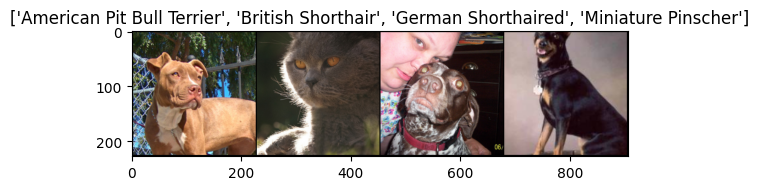

In [9]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(data_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])